In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import scienceplots
from src.environments import GridWorldEnv
from src.agents.dp import BackwardPropagation, FrontPolicyImprovement, BackPolicyImprovement


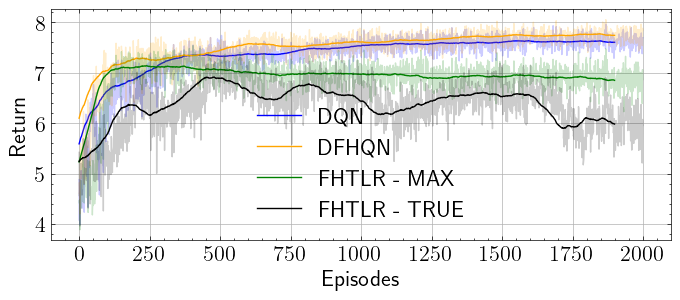

In [1]:
from src.plots import plot_wireless

plot_wireless()

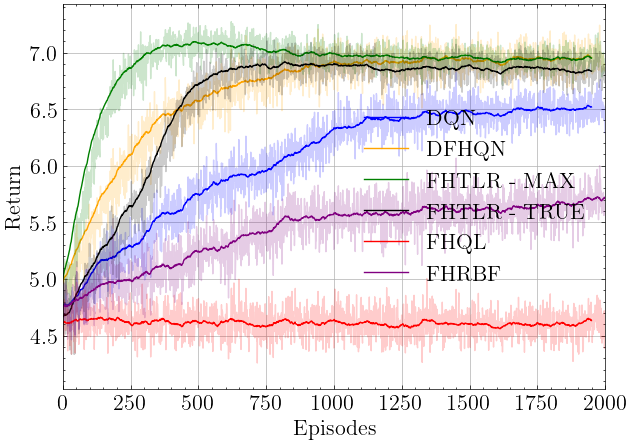

In [4]:
import matplotlib
import scienceplots
#dqn = Gs_dqn[n1:n2,:]
dqn3 = np.load("results/wireless/dqn-100.npy")
dfhqn = np.load("results/wireless/dfhqn-100.npy")
fhtlr_max = np.load("results/wireless/fhtlr_max-100.npy")
fhtlr_true = np.load("results/wireless/fhtlr_true-100.npy")
fhql = np.load("results/wireless/fhql-100.npy")
fhrbf = np.load("results/wireless/fhrbf-100.npy")

mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
mu_fhql = np.mean(fhql, axis=0)
mu_fgrbf = np.mean(fhrbf, axis=0)
#mu_dqn = np.mean(dqn, axis=0)

w = 50

#mu_dqn_smt = [np.mean(mu_dqn[i - w : i]) for i in range(w, len(mu_dqn))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]
mu_fhql_smt = [np.mean(mu_fhql[i - w : i]) for i in range(w, len(mu_fhql))]
mu_fhrbf_smt = [np.mean(mu_fgrbf[i - w : i]) for i in range(w, len(mu_fgrbf))]


with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})

    fig = plt.figure(figsize=[7, 5])
    #plt.plot(mu_dqn_smt, c="b", label="DQN")
    #plt.plot(mu_dqn, alpha=0.2, c="b")

    plt.plot(mu_dqn_smt3, c="b", label="DQN")
    plt.plot(mu_dqn3, alpha=0.2, c="b")
    plt.plot(mu_dfhqn_smt, c="orange", label="DFHQN")
    plt.plot(mu_dfhqn, alpha=0.2, c="orange")
    plt.plot(mu_fhtlr_max_smt, c="g", label="FHTLR - MAX")
    plt.plot(mu_fhtlr_max, alpha=0.2, c="g")
    plt.plot(mu_fhtlr_true_smt, c="k", label="FHTLR - TRUE")
    plt.plot(mu_fhtlr_true, alpha=0.2, c="k")
    plt.plot(mu_fhql_smt, c="r", label="FHQL")
    plt.plot(mu_fhql, alpha=0.2, c="r")
    """plt.plot(mu_linear_smt, c="purple", label="BF")
    plt.plot(mu_linear, alpha=0.2, c="purple")"""
    plt.plot(mu_fhrbf_smt, c="purple", label="FHRBF")
    plt.plot(mu_fgrbf, alpha=0.2, c="purple")
    plt.xlim(0, 2000)
    #plt.ylim(-3, 1.6)
    plt.grid()
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Return")
    plt.show()

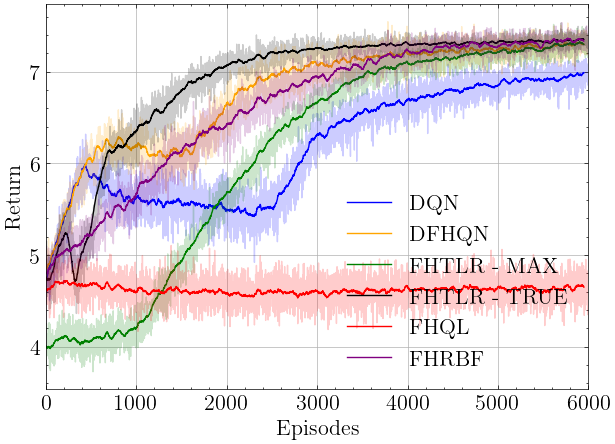

In [10]:
import matplotlib
import scienceplots
#dqn = Gs_dqn[n1:n2,:]
dqn3 = np.load("results/wireless_dqn-explore.npy")
dfhqn = np.load("results/wireless_dfhqn-explore.npy")
#fhtlr_max = np.load("results/wireless/fhtlr_max-100.npy")
#fhtlr_true = np.load("results/wireless/fhtlr_true-100.npy")
fhtlr_max = np.load("results/wireless_fhtlr_max-explore.npy")
fhtlr_true = np.load("results/wireless_fhtlr_true-explore.npy")
fhql = np.load("results/wireless_fhql-explore.npy")
linear = np.load("results/wireless/bf-100.npy")
fhlinear = np.load("results/wireless_fhbf-explore.npy")
fhrbf = np.load("results/wireless_fhrbf-5.npy")

mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
mu_fhql = np.mean(fhql, axis=0)
mu_linear = np.mean(linear, axis=0)
mu_fhlinear = np.mean(fhlinear, axis=0)
mu_fgrbf = np.mean(fhrbf, axis=0)
#mu_dqn = np.mean(dqn, axis=0)

w = 50

#mu_dqn_smt = [np.mean(mu_dqn[i - w : i]) for i in range(w, len(mu_dqn))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]
mu_fhql_smt = [np.mean(mu_fhql[i - w : i]) for i in range(w, len(mu_fhql))]
mu_linear_smt = [np.mean(mu_linear[i - w : i]) for i in range(w, len(mu_linear))]
mu_fhlinear_smt = [np.mean(mu_fhlinear[i - w : i]) for i in range(w, len(mu_fhlinear))]
mu_fhrbf_smt = [np.mean(mu_fgrbf[i - w : i]) for i in range(w, len(mu_fgrbf))]


with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})

    fig = plt.figure(figsize=[7, 5])
    #plt.plot(mu_dqn_smt, c="b", label="DQN")
    #plt.plot(mu_dqn, alpha=0.2, c="b")

    plt.plot(mu_dqn_smt3, c="b", label="DQN")
    plt.plot(mu_dqn3, alpha=0.2, c="b")
    plt.plot(mu_dfhqn_smt, c="orange", label="DFHQN")
    plt.plot(mu_dfhqn, alpha=0.2, c="orange")
    plt.plot(mu_fhtlr_max_smt, c="g", label="FHTLR - MAX")
    plt.plot(mu_fhtlr_max, alpha=0.2, c="g")
    plt.plot(mu_fhtlr_true_smt, c="k", label="FHTLR - TRUE")
    plt.plot(mu_fhtlr_true, alpha=0.2, c="k")
    plt.plot(mu_fhql_smt, c="r", label="FHQL")
    plt.plot(mu_fhql, alpha=0.2, c="r")
    """plt.plot(mu_linear_smt, c="purple", label="BF")
    plt.plot(mu_linear, alpha=0.2, c="purple")
    plt.plot(mu_fhlinear_smt, c="brown", label="FHBF")
    plt.plot(mu_fhlinear, alpha=0.2, c="brown")"""
    plt.plot(mu_fhrbf_smt, c="purple", label="FHRBF")
    plt.plot(mu_fgrbf, alpha=0.2, c="purple")
    plt.xlim(0, 6000)
    #plt.ylim(-3, 1.6)
    plt.grid()
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Return")
    plt.show()


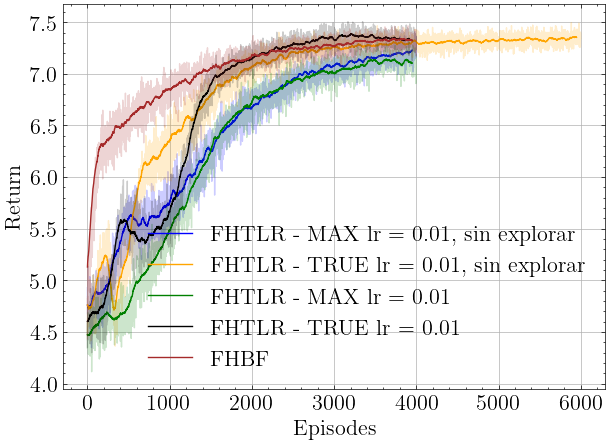

In [3]:
import matplotlib
import scienceplots
#dqn = Gs_dqn[n1:n2,:]
dqn3 = np.load("results/wireless_fhtlr_true-explore(lr01e99999).npy")
dfhqn = np.load("results/wireless_fhtlr_true-explore.npy")
fhtlr_max = np.load("results/wireless/others/wireless_fhtlr_max-explore(lr001).npy")
fhtlr_true = np.load("results/wireless/others/wireless_fhtlr_true-explore(lr001).npy")
fhlinear = np.load("results/wireless/fhbf-100.npy")


mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
mu_fhlinear = np.mean(fhlinear, axis=0)
#mu_dqn = np.mean(dqn, axis=0)

w = 50

#mu_dqn_smt = [np.mean(mu_dqn[i - w : i]) for i in range(w, len(mu_dqn))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]
mu_fhlinear_smt = [np.mean(mu_fhlinear[i - w : i]) for i in range(w, len(mu_fhlinear))]


with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})

    fig = plt.figure(figsize=[7, 5])
    #plt.plot(mu_dqn_smt, c="b", label="DQN")
    #plt.plot(mu_dqn, alpha=0.2, c="b")

    plt.plot(mu_dqn_smt3, c="b", label="FHTLR - MAX lr = 0.01, sin explorar")
    plt.plot(mu_dqn3, alpha=0.2, c="b")
    plt.plot(mu_dfhqn_smt, c="orange", label="FHTLR - TRUE lr = 0.01, sin explorar")
    plt.plot(mu_dfhqn, alpha=0.2, c="orange")
    plt.plot(mu_fhtlr_max_smt, c="g", label="FHTLR - MAX lr = 0.01")
    plt.plot(mu_fhtlr_max, alpha=0.2, c="g")
    plt.plot(mu_fhtlr_true_smt, c="k", label="FHTLR - TRUE lr = 0.01")
    plt.plot(mu_fhtlr_true, alpha=0.2, c="k")
    """plt.plot(mu_linear_smt, c="purple", label="BF")
    plt.plot(mu_linear, alpha=0.2, c="purple")"""
    plt.plot(mu_fhlinear_smt, c="brown", label="FHBF")
    plt.plot(mu_fhlinear, alpha=0.2, c="brown")
    #plt.xlim(0, 2000)
    #plt.ylim(-3, 1.6)
    plt.grid()
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Return")
    plt.show()


In [2]:
import matplotlib
import scienceplots
#dqn = Gs_dqn[n1:n2,:]
dqn3 = np.load("results/dqn-100.npy")
dfhqn = np.load("results/dfhqn-100.npy")
fhtlr_max = np.load("results/fhtlr_max-100.npy")
fhtlr_true = np.load("results/fhtlr_true-100.npy")

mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
#mu_dqn = np.mean(dqn, axis=0)

w = 100

#mu_dqn_smt = [np.mean(mu_dqn[i - w : i]) for i in range(w, len(mu_dqn))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]

with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})

    fig = plt.figure(figsize=[7, 5])
    #plt.plot(mu_dqn_smt, c="b", label="DQN")
    #plt.plot(mu_dqn, alpha=0.2, c="b")

    plt.plot(mu_dqn3, c="b", label="DQN")
    #plt.plot(mu_dqn3, alpha=0.2, c="b")
    plt.plot(mu_dfhqn, c="orange", label="DFHQN")
    #plt.plot(mu_dfhqn, alpha=0.2, c="orange")
    plt.plot(mu_fhtlr_max, c="g", label="FHTLR - MAX")
    #plt.plot(mu_fhtlr_max, alpha=0.2, c="g")
    plt.plot(mu_fhtlr_true, c="k", label="FHTLR - TRUE")
    #plt.plot(mu_fhtlr_true, alpha=0.2, c="k")
    #plt.xlim(0, 100_000)
    #plt.ylim(-3, 1.6)
    plt.grid()
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Return")
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'results/dqn-100.npy'

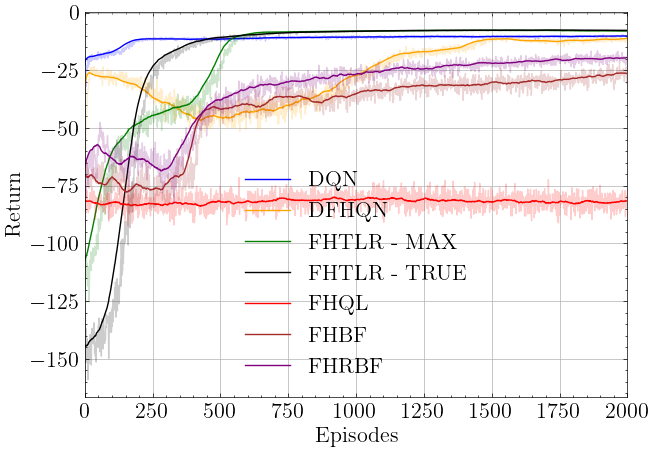

In [22]:
import matplotlib
import scienceplots

dqn3 = np.load("results/battery/battery_dqn-120.npy")
dfhqn = np.load("results/battery/battery_dfhqn-120.npy")
fhtlr_max = np.load("results/battery/battery_fhtlr_max-120.npy")
fhtlr_true = np.load("results/battery/battery_fhtlr_true-100.npy")
fhql = np.load("results/battery/battery_fhql-100.npy")
fhlinear = np.load("results/battery/battery_fhbf-100.npy")
fhrbf = np.load("results/battery/battery_fhrbf-100.npy")

mu_dqn3 = np.mean(dqn3, axis=0)
mu_dfhqn = np.mean(dfhqn, axis=0)
mu_fhtlr_max = np.mean(fhtlr_max, axis=0)
mu_fhtlr_true = np.mean(fhtlr_true, axis=0)
mu_fhql = np.mean(fhql, axis=0)
mu_fhlinear = np.mean(fhlinear, axis=0)
mu_fhrbf = np.mean(fhrbf, axis=0)

w = 50

mu_dqn_smt3 = [np.mean(mu_dqn3[i - w : i]) for i in range(w, len(mu_dqn3))]
mu_dfhqn_smt = [np.mean(mu_dfhqn[i - w : i]) for i in range(w, len(mu_dfhqn))]
mu_fhtlr_max_smt = [np.mean(mu_fhtlr_max[i - w : i]) for i in range(w, len(mu_fhtlr_max))]
mu_fhtlr_true_smt = [np.mean(mu_fhtlr_true[i - w : i]) for i in range(w, len(mu_fhtlr_true))]
mu_fhql_smt = [np.mean(mu_fhql[i - w : i]) for i in range(w, len(mu_fhql))]
mu_fhlinear_smt = [np.mean(mu_fhlinear[i - w : i]) for i in range(w, len(mu_fhlinear))]
mu_fhrbf_smt = [np.mean(mu_fhrbf[i - w : i]) for i in range(w, len(mu_fhrbf))]


with plt.style.context(["science"], ["ieee"]):
    matplotlib.rcParams.update({"font.size": 16})

    fig = plt.figure(figsize=[7, 5])
    #plt.plot(mu_dqn_smt, c="b", label="DQN")
    #plt.plot(mu_dqn, alpha=0.2, c="b")

    plt.plot(mu_dqn_smt3, c="b", label="DQN")
    plt.plot(mu_dqn3, alpha=0.2, c="b")
    plt.plot(mu_dfhqn_smt, c="orange", label="DFHQN")
    plt.plot(mu_dfhqn, alpha=0.2, c="orange")
    plt.plot(mu_fhtlr_max_smt, c="g", label="FHTLR - MAX")
    plt.plot(mu_fhtlr_max, alpha=0.2, c="g")
    plt.plot(mu_fhtlr_true_smt, c="k", label="FHTLR - TRUE")
    plt.plot(mu_fhtlr_true, alpha=0.2, c="k")
    plt.plot(mu_fhql_smt, c="r", label="FHQL")
    plt.plot(mu_fhql, alpha=0.2, c="r")
    #plt.plot(mu_linear_smt, c="purple", label="BF")
    #plt.plot(mu_linear, alpha=0.2, c="purple")
    plt.plot(mu_fhlinear_smt, c="brown", label="FHBF")
    plt.plot(mu_fhlinear, alpha=0.2, c="brown")
    plt.plot(mu_fhrbf_smt, c="purple", label="FHRBF")
    plt.plot(mu_fhrbf, alpha=0.2, c="purple")
    plt.xlim(0, 2000)
    #plt.ylim(-30, -5)
    plt.grid()
    plt.legend()
    plt.xlabel("Episodes")
    plt.ylabel("Return")
    plt.show()